In [17]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Set up ##

In [18]:
q_correction = 0.890
p_atm = 96500.000
t_atm = 22.000
rho_atm = 1.140
mu_atm = 1.822*10**-5
D = 19.050 / 1000
w = 0.3048
l = 0.3048

## Importing Data ##

In [19]:
pos_1_data = pd.read_csv('pos_1.csv')
pos_2_data = pd.read_csv('pos_2.csv')
pos_3_data = pd.read_csv('pos_3.csv')
pos_4_data = pd.read_csv('pos_4.csv')

speed_1_data = pd.read_csv('speed_10.csv')
speed_2_data = pd.read_csv('speed_15.csv')
speed_3_data = pd.read_csv('speed_20.csv')

pos_1_lat = np.array(pos_1_data['Lateral Position [mm]'])/1000
pos_1_probe_vel = np.array(pos_1_data['Pitot/Static Vel [m/s]'])
pos_1_probe_std = np.array(pos_1_data['Pitot/Static Vel Stdev [m/s]'])
pos_1_hot_vel = np.array(pos_1_data['Hot Wire Vel [m/s]'])
pos_1_hot_std = np.array(pos_1_data['Hot Wire Vel Stdev [m/s]'])

pos_2_lat = np.array(pos_2_data['Lateral Position [mm]'])/1000
pos_2_probe_vel = np.array(pos_2_data['Pitot/Static Vel [m/s]'])
pos_2_probe_std = np.array(pos_2_data['Pitot/Static Vel Stdev [m/s]'])
pos_2_hot_vel = np.array(pos_2_data['Hot Wire Vel [m/s]'])
pos_2_hot_std = np.array(pos_2_data['Hot Wire Vel Stdev [m/s]'])

pos_3_lat = np.array(pos_3_data['Lateral Position [mm]'])/1000
pos_3_probe_vel = np.array(pos_3_data['Pitot/Static Vel [m/s]'])
pos_3_probe_std = np.array(pos_3_data['Pitot/Static Vel Stdev [m/s]'])
pos_3_hot_vel = np.array(pos_3_data['Hot Wire Vel [m/s]'])
pos_3_hot_std = np.array(pos_3_data['Hot Wire Vel Stdev [m/s]'])

pos_4_lat = np.array(pos_4_data['Lateral Position [mm]'])/1000
pos_4_probe_vel = np.array(pos_4_data['Pitot/Static Vel [m/s]'])
pos_4_probe_std = np.array(pos_4_data['Pitot/Static Vel Stdev [m/s]'])
pos_4_hot_vel = np.array(pos_4_data['Hot Wire Vel [m/s]'])
pos_4_hot_std = np.array(pos_4_data['Hot Wire Vel Stdev [m/s]'])

speed_1_freq = np.array(speed_1_data['Frequency [Hz]'])
speed_1_amp = np.array(speed_1_data['FFT Amplitude [Vrms]'])

speed_2_freq = np.array(speed_2_data['Frequency [Hz]'])
speed_2_amp = np.array(speed_2_data['FFT Amplitude [Vrms]'])

speed_3_freq = np.array(speed_3_data['Frequency [Hz]'])
speed_3_amp = np.array(speed_3_data['FFT Amplitude [Vrms]'])


## Calibration Coefficients ##

In [20]:
calibration_coeffs = np.array([-30.117,  65.927,  -42.750,  1.985,  4.417])

### Task 1 ###

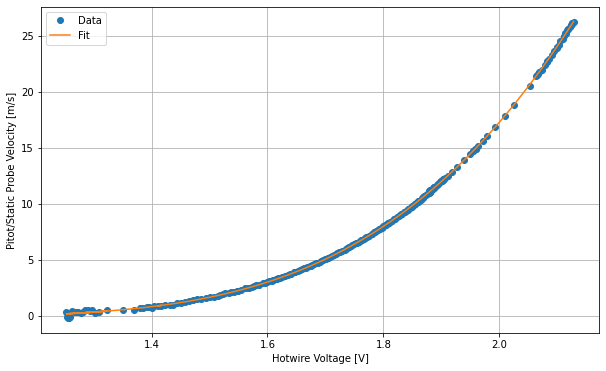

In [21]:
calib_data = pd.read_csv('calibration.csv')
probe_vel = np.array(calib_data['Pitot/static Probe Velocity [m/s]'])
hotwire_volt = np.array(calib_data['Hotwire Ev [Volts]'])

fitted_dat = calibration_coeffs[0] + calibration_coeffs[1]*hotwire_volt + calibration_coeffs[2]*hotwire_volt**2 + calibration_coeffs[3]*hotwire_volt**3 + calibration_coeffs[4]*hotwire_volt**4

plt.figure(figsize=(10, 6))
plt.plot(hotwire_volt, probe_vel, 'o', label='Data')
plt.plot(hotwire_volt, fitted_dat, label='Fit')
plt.xlabel('Hotwire Voltage [V]')
plt.ylabel('Pitot/Static Probe Velocity [m/s]')
plt.grid()
plt.legend()
plt.show()

### Task 2 ###

In [22]:
freesteam_vel_pos = np.array([19.964, 19.946, 19.956, 19.952])
streamwise_locations_pos = np.array([238.100, 161.900, 104.800, 66.700]) / 1000


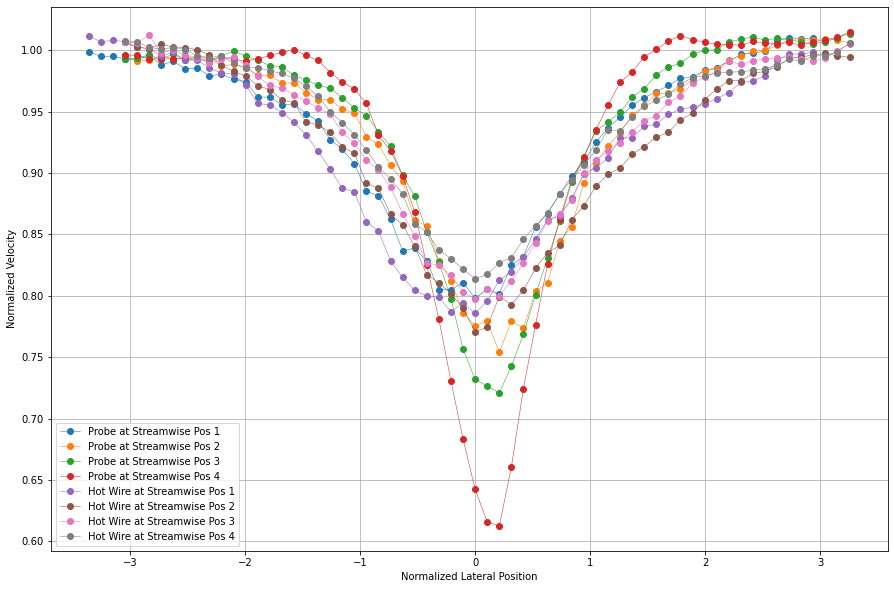

In [23]:
pos_1_y_vel_min_probe = pos_1_lat[np.where(pos_1_probe_vel == np.min(pos_1_probe_vel))[0][0]]
pos_2_y_vel_min_probe = pos_2_lat[np.where(pos_2_probe_vel == np.min(pos_2_probe_vel))[0][0]]
pos_3_y_vel_min_probe = pos_3_lat[np.where(pos_3_probe_vel == np.min(pos_3_probe_vel))[0][0]]
pos_4_y_vel_min_probe = pos_4_lat[np.where(pos_4_probe_vel == np.min(pos_4_probe_vel))[0][0]]

pos_1_y_vel_min_hot = pos_1_lat[np.where(pos_1_hot_vel == np.min(pos_1_hot_vel))[0][0]]
pos_2_y_vel_min_hot = pos_2_lat[np.where(pos_2_hot_vel == np.min(pos_2_hot_vel))[0][0]]
pos_3_y_vel_min_hot = pos_3_lat[np.where(pos_3_hot_vel == np.min(pos_3_hot_vel))[0][0]]
pos_4_y_vel_min_hot = pos_4_lat[np.where(pos_4_hot_vel == np.min(pos_4_hot_vel))[0][0]]

pos_1_norm_lat_probe = (pos_1_lat - pos_1_y_vel_min_hot) / D
pos_2_norm_lat_probe = (pos_2_lat - pos_2_y_vel_min_hot) / D
pos_3_norm_lat_probe = (pos_3_lat - pos_3_y_vel_min_hot) / D
pos_4_norm_lat_probe = (pos_4_lat - pos_4_y_vel_min_hot) / D

pos_1_norm_lat_hot = (pos_1_lat - pos_1_y_vel_min_hot) / D
pos_2_norm_lat_hot = (pos_2_lat - pos_2_y_vel_min_hot) / D
pos_3_norm_lat_hot = (pos_3_lat - pos_3_y_vel_min_hot) / D
pos_4_norm_lat_hot = (pos_4_lat - pos_4_y_vel_min_hot) / D

pos_1_free_probe = np.mean(np.append(pos_1_probe_vel[0:5], pos_1_probe_vel[-5:-1]))
pos_2_free_probe = np.mean(np.append(pos_2_probe_vel[0:5], pos_2_probe_vel[-5:-1]))
pos_3_free_probe = np.mean(np.append(pos_3_probe_vel[0:5], pos_3_probe_vel[-5:-1]))
pos_4_free_probe = np.mean(np.append(pos_4_probe_vel[0:5], pos_4_probe_vel[-5:-1]))

free_probe = np.array([pos_1_free_probe, pos_2_free_probe, pos_3_free_probe, pos_4_free_probe])

pos_1_free_hot = np.mean(np.append(pos_1_hot_vel[0:5], pos_1_hot_vel[-5:-1]))
pos_2_free_hot = np.mean(np.append(pos_2_hot_vel[0:5], pos_2_hot_vel[-5:-1]))
pos_3_free_hot = np.mean(np.append(pos_3_hot_vel[0:5], pos_3_hot_vel[-5:-1]))
pos_4_free_hot = np.mean(np.append(pos_4_hot_vel[0:5], pos_4_hot_vel[-5:-1]))

free_hot = np.array([pos_1_free_hot, pos_2_free_hot, pos_3_free_hot, pos_4_free_hot])

pos_1_probe_vel_norm = pos_1_probe_vel / pos_1_free_probe
pos_2_probe_vel_norm = pos_2_probe_vel / pos_2_free_probe
pos_3_probe_vel_norm = pos_3_probe_vel / pos_3_free_probe
pos_4_probe_vel_norm = pos_4_probe_vel / pos_4_free_probe

pos_1_hot_vel_norm = pos_1_hot_vel / pos_1_free_hot
pos_2_hot_vel_norm = pos_2_hot_vel / pos_2_free_hot
pos_3_hot_vel_norm = pos_3_hot_vel / pos_3_free_hot
pos_4_hot_vel_norm = pos_4_hot_vel / pos_4_free_hot

plt.figure(figsize=(15,10))
plt.plot(pos_1_norm_lat_probe, pos_1_probe_vel_norm, 'o-', label='Probe at Streamwise Pos 1', linewidth=0.5)
plt.plot(pos_2_norm_lat_probe, pos_2_probe_vel_norm, 'o-', label='Probe at Streamwise Pos 2', linewidth=0.5)
plt.plot(pos_3_norm_lat_probe, pos_3_probe_vel_norm, 'o-', label='Probe at Streamwise Pos 3', linewidth=0.5)
plt.plot(pos_4_norm_lat_probe, pos_4_probe_vel_norm, 'o-', label='Probe at Streamwise Pos 4', linewidth=0.5)
plt.plot(pos_1_norm_lat_hot, pos_1_hot_vel_norm, 'o-', label='Hot Wire at Streamwise Pos 1', linewidth=0.5)
plt.plot(pos_2_norm_lat_hot, pos_2_hot_vel_norm, 'o-', label='Hot Wire at Streamwise Pos 2', linewidth=0.5)
plt.plot(pos_3_norm_lat_hot, pos_3_hot_vel_norm, 'o-', label='Hot Wire at Streamwise Pos 3', linewidth=0.5)
plt.plot(pos_4_norm_lat_hot, pos_4_hot_vel_norm, 'o-', label='Hot Wire at Streamwise Pos 4', linewidth=0.5)
plt.xlabel('Normalized Lateral Position')
plt.ylabel('Normalized Velocity')
plt.grid()
plt.legend()
plt.show()

### Task 3 ###

In [24]:
def calc_F(rho, w, u, u_free, l_step):
    F = 0
    for i in range(len(u)-1):
        F += rho * w * (u[i]*(u_free - u[i]) + u[i+1]*(u_free - u[i+1]))/2 * l_step
    return F

In [25]:
Re_probe = np.around((rho_atm * free_probe * D / mu_atm)/(10**4), decimals=3)
Re_hot = np.around((rho_atm * free_hot * D / mu_atm)/(10**4), decimals=3)

F_pos_1_probe = calc_F(rho_atm, w, pos_1_probe_vel, pos_1_free_probe, pos_1_lat[1]- pos_1_lat[0])
F_pos_2_probe = calc_F(rho_atm, w, pos_2_probe_vel, pos_2_free_probe, pos_2_lat[1]- pos_2_lat[0])
F_pos_3_probe = calc_F(rho_atm, w, pos_3_probe_vel, pos_3_free_probe, pos_3_lat[1]- pos_3_lat[0])
F_pos_4_probe = calc_F(rho_atm, w, pos_4_probe_vel, pos_4_free_probe, pos_4_lat[1]- pos_4_lat[0])

F_pos_2_hot = calc_F(rho_atm, w, pos_2_hot_vel, pos_1_free_hot, pos_2_lat[1]- pos_2_lat[0])
F_pos_1_hot = calc_F(rho_atm, w, pos_1_hot_vel, pos_2_free_hot, pos_1_lat[1]- pos_1_lat[0])
F_pos_3_hot = calc_F(rho_atm, w, pos_3_hot_vel, pos_3_free_hot, pos_3_lat[1]- pos_3_lat[0])
F_pos_4_hot = calc_F(rho_atm, w, pos_4_hot_vel, pos_4_free_hot, pos_4_lat[1]- pos_4_lat[0])

F_probe = np.around(np.array([F_pos_1_probe, F_pos_2_probe, F_pos_3_probe, F_pos_4_probe]), decimals=3)
F_hot = np.around(np.array([F_pos_1_hot, F_pos_2_hot, F_pos_3_hot, F_pos_4_hot]), decimals=3)

C_d_probe = np.around(F_probe / (0.5 * rho_atm * freesteam_vel_pos**2 * w * D), decimals=3)
C_d_hot = np.around(F_hot / (0.5 * rho_atm * freesteam_vel_pos**2 * w * D), decimals=3)

df = pd.DataFrame({'Position (m)': streamwise_locations_pos, 'Re (10^4) (ND)': Re_probe, 'Drag Force (N)': F_probe, 'Drag Coefficient': C_d_probe})
print(df.to_latex())
display(HTML(df.to_html()))
df = pd.DataFrame({'Position (m)': streamwise_locations_pos, 'Re (10^4) (ND)': Re_hot, 'Drag Force (N)': F_hot, 'Drag Coefficient': C_d_hot})
print(df.to_latex())
display(HTML(df.to_html()))

\begin{tabular}{lrrrr}
\toprule
{} &  Position (m) &  Re (10\textasciicircum 4) (ND) &  Drag Force (N) &  Drag Coefficient \\
\midrule
0 &        0.2381 &           2.389 &           0.983 &             0.745 \\
1 &        0.1619 &           2.392 &           0.945 &             0.718 \\
2 &        0.1048 &           2.385 &           0.842 &             0.639 \\
3 &        0.0667 &           2.386 &           0.854 &             0.648 \\
\bottomrule
\end{tabular}



/var/folders/84/3j3h65z55vs1f4cfjg8vd24r0000gn/T/ipykernel_48863/3448455878.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


,Position (m),Re (10^4) (ND),Drag Force (N),Drag Coefficient
0,0.2381,2.389,0.983,0.745
1,0.1619,2.392,0.945,0.718
2,0.1048,2.385,0.842,0.639
3,0.0667,2.386,0.854,0.648


\begin{tabular}{lrrrr}
\toprule
{} &  Position (m) &  Re (10\textasciicircum 4) (ND) &  Drag Force (N) &  Drag Coefficient \\
\midrule
0 &        0.2381 &           2.465 &           1.328 &             1.007 \\
1 &        0.1619 &           2.480 &           1.108 &             0.841 \\
2 &        0.1048 &           2.476 &           1.037 &             0.787 \\
3 &        0.0667 &           2.489 &           0.954 &             0.724 \\
\bottomrule
\end{tabular}



/var/folders/84/3j3h65z55vs1f4cfjg8vd24r0000gn/T/ipykernel_48863/3448455878.py:24: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


,Position (m),Re (10^4) (ND),Drag Force (N),Drag Coefficient
0,0.2381,2.465,1.328,1.007
1,0.1619,2.480,1.108,0.841
2,0.1048,2.476,1.037,0.787
3,0.0667,2.489,0.954,0.724


### Task 4 ###

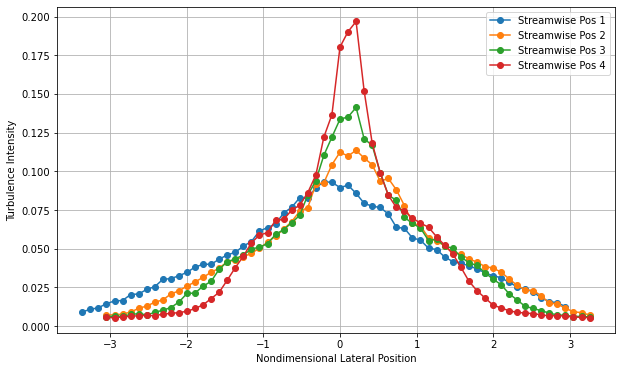

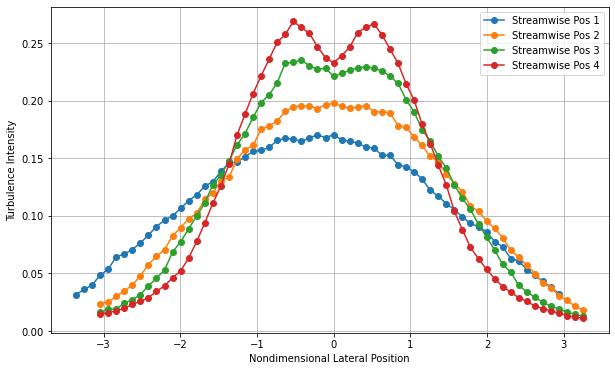

In [26]:
pos_1_probe_std_norm = pos_1_probe_std / pos_1_free_probe
pos_2_probe_std_norm = pos_2_probe_std / pos_2_free_probe
pos_3_probe_std_norm = pos_3_probe_std / pos_3_free_probe
pos_4_probe_std_norm = pos_4_probe_std / pos_4_free_probe

pos_1_hot_std_norm = pos_1_hot_std / pos_1_free_hot
pos_2_hot_std_norm = pos_2_hot_std / pos_2_free_hot
pos_3_hot_std_norm = pos_3_hot_std / pos_3_free_hot
pos_4_hot_std_norm = pos_4_hot_std / pos_4_free_hot

plt.figure(figsize=(10,6))
plt.plot(pos_1_norm_lat_probe, pos_1_probe_std_norm, 'o-', label='Streamwise Pos 1')
plt.plot(pos_2_norm_lat_probe, pos_2_probe_std_norm, 'o-', label='Streamwise Pos 2')
plt.plot(pos_3_norm_lat_probe, pos_3_probe_std_norm, 'o-', label='Streamwise Pos 3')
plt.plot(pos_4_norm_lat_probe, pos_4_probe_std_norm, 'o-', label='Streamwise Pos 4')
plt.xlabel("Nondimensional Lateral Position")
plt.ylabel("Turbulence Intensity")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(pos_1_norm_lat_hot, pos_1_hot_std_norm, 'o-', label='Streamwise Pos 1')
plt.plot(pos_2_norm_lat_hot, pos_2_hot_std_norm, 'o-', label='Streamwise Pos 2')
plt.plot(pos_3_norm_lat_hot, pos_3_hot_std_norm, 'o-', label='Streamwise Pos 3')
plt.plot(pos_4_norm_lat_hot, pos_4_hot_std_norm, 'o-', label='Streamwise Pos 4')
plt.xlabel("Nondimensional Lateral Position")
plt.ylabel("Turbulence Intensity")
plt.grid()
plt.legend()
plt.show()


### Task 5 ###

In [27]:
freestream_vel_speed = np.array([10.136, 15.176, 19.991])
streamwise_locations_speed = np.array([66.700, 66.700, 66.700])/1000
lateral_location_speed = np.array([14.000, 14.000, 14.000])

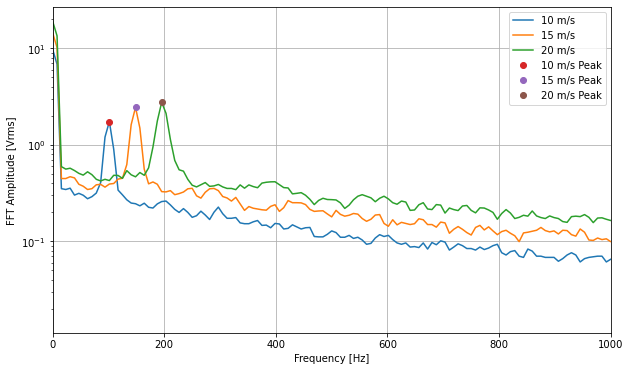

,Velocity,Re (10^4) (ND),Vortex Shedding Frequency (Hz),Vortex Shedding Amplitude (Vms),Strouhal Number
0,10.136,1.208,101.562,1.743,0.191
1,15.176,1.809,148.437,2.448,0.186
2,19.991,2.383,195.312,2.763,0.186


In [28]:
freq_idx_low = 3
freq_idx_high = 129

f_s_10 = speed_1_freq[freq_idx_low+np.where(speed_1_amp[freq_idx_low:freq_idx_high] == np.max(speed_1_amp[freq_idx_low:freq_idx_high]))[0][0]]
amp_10 = np.max(speed_1_amp[freq_idx_low:freq_idx_high])

f_s_15 = speed_2_freq[freq_idx_low+np.where(speed_2_amp[freq_idx_low:freq_idx_high] == np.max(speed_2_amp[freq_idx_low:freq_idx_high]))[0][0]]
amp_15 = np.max(speed_2_amp[freq_idx_low:freq_idx_high])

f_s_20 = speed_3_freq[freq_idx_low+np.where(speed_3_amp[freq_idx_low:freq_idx_high] == np.max(speed_3_amp[freq_idx_low:freq_idx_high]))[0][0]]
amp_20 = np.max(speed_3_amp[freq_idx_low:freq_idx_high])

plt.figure(figsize=(10,6))
plt.plot(speed_1_freq, speed_1_amp, label='10 m/s')
plt.plot(speed_2_freq, speed_2_amp, label='15 m/s')
plt.plot(speed_3_freq, speed_3_amp, label='20 m/s')
plt.plot(f_s_10, amp_10, 'o', label='10 m/s Peak')
plt.plot(f_s_15, amp_15, 'o', label='15 m/s Peak')
plt.plot(f_s_20, amp_20, 'o', label='20 m/s Peak')
plt.xlim(0, 1000)
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('FFT Amplitude [Vrms]')
plt.grid()
plt.legend()
plt.show()

Re = np.around((rho_atm * freestream_vel_speed * D / mu_atm)/(10**4), decimals=3)
freq_list = np.array([f_s_10, f_s_15, f_s_20])
amp_list = np.array([amp_10, amp_15, amp_20])

strouhal = np.around(freq_list * D / freestream_vel_speed, decimals=3)

df = pd.DataFrame({'Velocity': freestream_vel_speed,'Re (10^4) (ND)': Re, 'Vortex Shedding Frequency (Hz)': freq_list, 'Vortex Shedding Amplitude (Vms)':amp_list,'Strouhal Number': strouhal})
display(HTML(df.to_html()))

### Task 6 ###

In [29]:
def vel_at_wake_thickness(u_min, u_inf):
    return u_inf - 0.605*(u_inf - u_min)

In [30]:
u_L_0_pos_1_probe = vel_at_wake_thickness(np.min(pos_1_probe_vel), pos_1_free_probe)
u_L_0_pos_2_probe = vel_at_wake_thickness(np.min(pos_2_probe_vel), pos_2_free_probe)
u_L_0_pos_3_probe = vel_at_wake_thickness(np.min(pos_3_probe_vel), pos_3_free_probe)
u_L_0_pos_4_probe = vel_at_wake_thickness(np.min(pos_4_probe_vel), pos_4_free_probe)

u_L_0_probe_list = np.array([u_L_0_pos_1_probe, u_L_0_pos_2_probe, u_L_0_pos_3_probe, u_L_0_pos_4_probe])

u_L_0_pos_1_hot = vel_at_wake_thickness(np.min(pos_1_hot_vel), pos_1_free_hot)
u_L_0_pos_2_hot = vel_at_wake_thickness(np.min(pos_2_hot_vel), pos_2_free_hot)
u_L_0_pos_3_hot = vel_at_wake_thickness(np.min(pos_3_hot_vel), pos_3_free_hot)
u_L_0_pos_4_hot = vel_at_wake_thickness(np.min(pos_4_hot_vel), pos_4_free_hot)

u_L_0_hot_list = np.array([u_L_0_pos_1_hot, u_L_0_pos_2_hot, u_L_0_pos_3_hot, u_L_0_pos_4_hot])

L_0_probe = np.array([11.62153, 9.60131, 8.31142, 8.7858])/1000
L_0_hot = np.array([14.82993, 14.9036, 14.98993, 14.73338])/1000

K, x_0 = sym.symbols('K, x_0')
Eq1 = sym.Eq(L_0_probe[0]/D, K*sym.sqrt((streamwise_locations_pos[0] - x_0)/D))
Eq2 = sym.Eq(L_0_probe[1]/D, K*sym.sqrt((streamwise_locations_pos[1] - x_0)/D))
soln = sym.solve((Eq1, Eq2), (K, x_0))
K_probe = float(soln[0][0])
x_0_probe = float(soln[0][1])

Eq1 = sym.Eq(L_0_hot[2]/D, K*sym.sqrt((streamwise_locations_pos[2] - x_0)/D))
Eq2 = sym.Eq(L_0_hot[3]/D, K*sym.sqrt((streamwise_locations_pos[3] - x_0)/D))
soln = sym.solve((Eq1, Eq2), (K, x_0))  
K_hot = float(soln[0][0])
x_0_hot = float(soln[0][1])

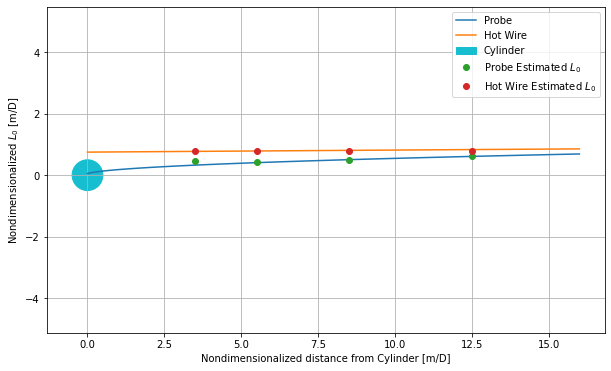

In [94]:
x = np.linspace(0, l, 100)
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.plot(x/D, K_probe*np.sqrt((x-x_0_probe)/D), label='Probe')
plt.plot(x/D, K_hot*np.sqrt((x-x_0_hot)/D), label='Hot Wire')
ax.add_patch(plt.Circle((0,0),1/2, color='tab:cyan',label='Cylinder'))
plt.plot(streamwise_locations_pos/D, L_0_probe/D, 'o', label=r'Probe Estimated $L_0$')
plt.plot(streamwise_locations_pos/D, L_0_hot/D, 'o', label=r'Hot Wire Estimated $L_0$')
plt.xlabel('Nondimensionalized distance from Cylinder [m/D]')
plt.ylabel(r'Nondimensionalized $L_0$ [m/D]')
plt.ylim(-1, 1)
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()